## **Problem 1**

In [187]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [189]:
!ls

 data  'Homework 1.gdoc'   Untitled0.ipynb


In [190]:
import torch
from PIL import Image
import torchvision.transforms as transforms
from matplotlib.pyplot import imshow
import numpy as np

In [191]:
def get_img_mean(img_path):
    img = Image.open(img_path)
    %matplotlib inline
    imshow(np.asarray(img))
    transform = transforms.ToTensor()
    img_T = transform(img)
    print("Image Shape:\n", img_T.shape)
    Red_mean, Green_mean ,Blue_mean = torch.mean(img_T, dim = [1,2])
    print("Red channel Mean:", Red_mean)
    print("Green channel Mean:", Green_mean)
    print("Blue channel Mean:", Blue_mean)


Image Shape:
 torch.Size([3, 240, 210])
Red channel Mean: tensor(0.7523)
Green channel Mean: tensor(0.5243)
Blue channel Mean: tensor(0.5203)


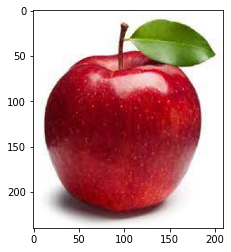

In [192]:
get_img_mean('data/colored_images/red_1.jpeg')

Image Shape:
 torch.Size([3, 591, 591])
Red channel Mean: tensor(0.6140)
Green channel Mean: tensor(0.0219)
Blue channel Mean: tensor(0.0599)


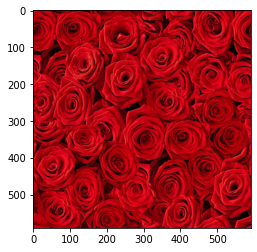

In [193]:
get_img_mean('data/colored_images/red_2.jpeg')

Image Shape:
 torch.Size([3, 340, 835])
Red channel Mean: tensor(0.2253)
Green channel Mean: tensor(0.3539)
Blue channel Mean: tensor(0.0892)


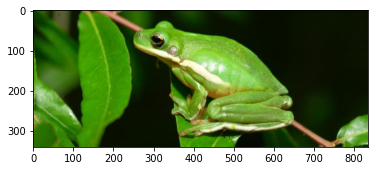

In [194]:
get_img_mean('data/colored_images/green_1.jpeg')

Image Shape:
 torch.Size([3, 460, 460])
Red channel Mean: tensor(0.3219)
Green channel Mean: tensor(0.4968)
Blue channel Mean: tensor(0.2225)


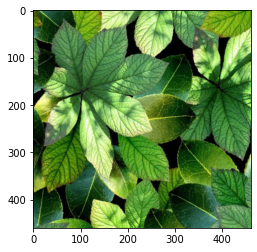

In [195]:
get_img_mean('data/colored_images/green_2.jpeg')

Image Shape:
 torch.Size([3, 396, 563])
Red channel Mean: tensor(0.0069)
Green channel Mean: tensor(0.1730)
Blue channel Mean: tensor(0.4911)


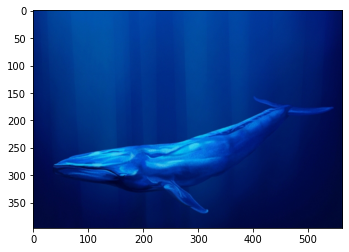

In [196]:
get_img_mean('data/colored_images/blue_1.jpeg')

# **Problem 3**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [3]:
cd gdrive/MyDrive/UNCC/Spring22/Real-Time\ Machine\ Learning

/content/gdrive/MyDrive/UNCC/Spring22/Real-Time Machine Learning


In [4]:
cd Homeworks/Homework\ 1

/content/gdrive/MyDrive/UNCC/Spring22/Real-Time Machine Learning/Homeworks/Homework 1


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

In [117]:
housing = pd.DataFrame(pd.read_csv("data/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [118]:
housing.shape

(545, 13)

In [173]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','price']
data = housing[num_vars]
data.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [180]:
target_column = 'price'  # Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()  
targets = data[[target_column]].to_numpy()                                 
inputs.shape, targets.shape

((545, 5), (545, 1))

In [181]:
def normalize_data(x):
    x = (x - np.mean(x))/ (np.max(x) - np.min(x))
    return x

In [182]:
X= normalize_data(inputs)
X = torch.from_numpy(X)
X = X.float()
targets = torch.from_numpy(targets)
y = targets.float()

In [205]:
def model(X, params):
    w=params[:5]
    b=params[5]
    return torch.mul(X, w.t()) + b
    #return X @ w.t() + b

def loss_fn(y_p, y):
    squared_diffs = (y_p - y)**2
    return squared_diffs.mean()


def training_loop(n_epochs, optimizer, params, X, y):
    loss_values = []
    for epoch in range(1, n_epochs + 1):

        y_p = model(X, params) 
        loss = loss_fn(y_p, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            loss_values.append(float(loss))
            
    return [params, loss_values]

In [206]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr=learning_rate)

train_1 = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, 
    X = X,
    y = y )

Epoch 500, Loss 3441859231744.000000
Epoch 1000, Loss 3438429339648.000000
Epoch 1500, Loss 3437104201728.000000
Epoch 2000, Loss 3435915640832.000000
Epoch 2500, Loss 3434743595008.000000
Epoch 3000, Loss 3433582559232.000000
Epoch 3500, Loss 3432430698496.000000
Epoch 4000, Loss 3431288274944.000000
Epoch 4500, Loss 3430155026432.000000
Epoch 5000, Loss 3429031739392.000000


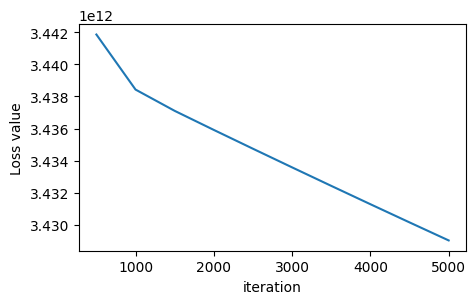

In [209]:
fig = plt.figure(figsize=(5, 3),dpi=100)
plt.xlabel("iteration")
plt.ylabel("Loss value")
it=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.plot(it, train_1[1]) # <2>
plt.show()

In [210]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)

train_2 = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, 
    X = X,
    y = y )

Epoch 500, Loss 3470104199168.000000
Epoch 1000, Loss 3462764167168.000000
Epoch 1500, Loss 3457188626432.000000
Epoch 2000, Loss 3452946087936.000000
Epoch 2500, Loss 3449711493120.000000
Epoch 3000, Loss 3447238426624.000000
Epoch 3500, Loss 3445339979776.000000
Epoch 4000, Loss 3443876167680.000000
Epoch 4500, Loss 3442741084160.000000
Epoch 5000, Loss 3441853726720.000000


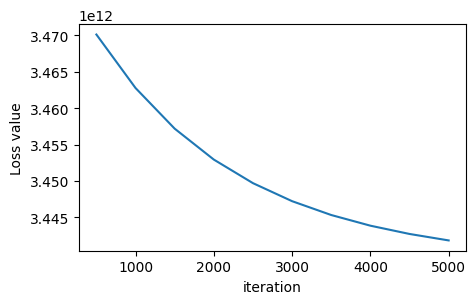

In [211]:
fig = plt.figure(figsize=(5, 3),dpi=100)
plt.xlabel("iteration")
plt.ylabel("Loss value")
it=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.plot(it, train_2[1]) # <2>
plt.show()

In [213]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)

train_3= training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, 
    X = X,
    y = y )


Epoch 500, Loss 6541489471488.000000
Epoch 1000, Loss 3888584589312.000000
Epoch 1500, Loss 3531721146368.000000
Epoch 2000, Loss 3482969178112.000000
Epoch 2500, Loss 3475584057344.000000
Epoch 3000, Loss 3473773953024.000000
Epoch 3500, Loss 3472733503488.000000
Epoch 4000, Loss 3471818358784.000000
Epoch 4500, Loss 3470941487104.000000
Epoch 5000, Loss 3470090567680.000000


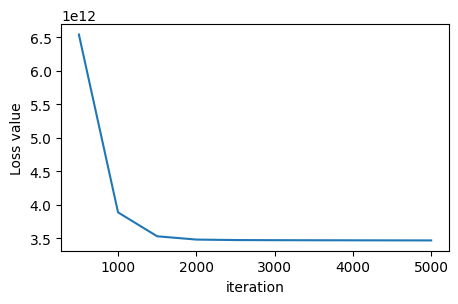

In [214]:
fig = plt.figure(figsize=(5, 3),dpi=100)
plt.xlabel("iteration")
plt.ylabel("Loss value")
it=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.plot(it, train_3[1]) # <2>
plt.show()

In [215]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)

train_4= training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, 
    X = X,
    y = y )

Epoch 500, Loss 22087674626048.000000
Epoch 1000, Loss 18704249126912.000000
Epoch 1500, Loss 15935977029632.000000
Epoch 2000, Loss 13671015120896.000000
Epoch 2500, Loss 11817856270336.000000
Epoch 3000, Loss 10301612228608.000000
Epoch 3500, Loss 9061034622976.000000
Epoch 4000, Loss 8045997850624.000000
Epoch 4500, Loss 7215498395648.000000
Epoch 5000, Loss 6535981301760.000000


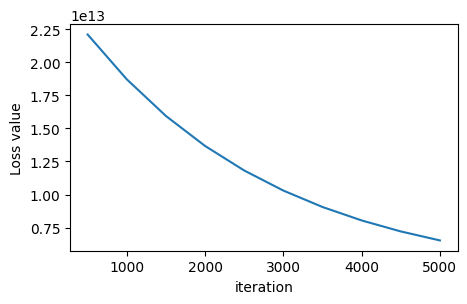

In [216]:
fig = plt.figure(figsize=(5, 3),dpi=100)
plt.xlabel("iteration")
plt.ylabel("Loss value")
it=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.plot(it, train_4[1]) # <2>
plt.show()

# **Problem 2**

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:
!ls

 data  'Homework 1.gdoc'   Untitled0.ipynb


In [49]:
%matplotlib inline
import numpy as np
import torch

In [50]:
def model(t_u, w2, w1, b):
    e=w2*(t_u**2);
    f= e + w1*t_u + b
    return f
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

def dmodel_dw2(t_u, w2, b):
    return t_u**2

def dmodel_dw1(t_u, w1, b):
    return t_u

def dmodel_db(t_u, w2, w1, b):
    return 1.0
def grad_fn(t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w2, w1, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])  # <1>

In [51]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params
        
        t_p = model(t_u, w2, w1, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w2, w1, b)  # <2>
        # import pdb;
        # pdb.set_trace();
        params = params - learning_rate * grad

        if (epoch%500)==0:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)


        if not torch.isfinite(loss).all():
            break  # <3>
            
            
    return params

In [113]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [114]:
from statistics import mean
def normalize_data(x):
    a = (x - mean(x))/ (max(x) -min(x))
    return a
t_un=np.array(t_u)
t_un= normalize_data(t_un)

In [115]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = torch.tensor(t_un)

In [95]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.1, 
    params = torch.tensor([0.1, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 500, Loss 2.260893
    Params: tensor([ 5.6223, 32.3569, 10.1017], dtype=torch.float64)
    Grad:   tensor([-0.0733, -0.0054,  0.0053], dtype=torch.float64)
Epoch 1000, Loss 2.125292
    Params: tensor([ 8.1491, 32.4485,  9.9201], dtype=torch.float64)
    Grad:   tensor([-0.0331, -0.0009,  0.0024], dtype=torch.float64)
Epoch 1500, Loss 2.097745
    Params: tensor([ 9.2884, 32.4791,  9.8382], dtype=torch.float64)
    Grad:   tensor([-0.0149, -0.0004,  0.0011], dtype=torch.float64)
Epoch 2000, Loss 2.092148
    Params: tensor([ 9.8020, 32.4930,  9.8013], dtype=torch.float64)
    Grad:   tensor([-0.0067, -0.0002,  0.0005], dtype=torch.float64)
Epoch 2500, Loss 2.091010
    Params: tensor([10.0335, 32.4992,  9.7847], dtype=torch.float64)
    Grad:   tensor([-3.0305e-03, -8.1519e-05,  2.1783e-04], dtype=torch.float64)
Epoch 3000, Loss 2.090779
    Params: tensor([10.1379, 32.5020,  9.7772], dtype=torch.float64)
    Grad:   tensor([-1.3661e-03, -3.6748e-05,  9.8193e-05], dtype=torch.fl

tensor([10.2200, 32.5042,  9.7713], dtype=torch.float64)

In [96]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.01, 
    params = torch.tensor([0.1, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 500, Loss 19.549596
    Params: tensor([ 1.2054, 16.9578, 10.4168], dtype=torch.float64)
    Grad:   tensor([-0.0917, -2.1895,  0.0055], dtype=torch.float64)
Epoch 1000, Loss 6.713366
    Params: tensor([ 1.7181, 24.7817, 10.3814], dtype=torch.float64)
    Grad:   tensor([-0.1100, -1.0739,  0.0078], dtype=torch.float64)
Epoch 1500, Loss 3.571305
    Params: tensor([ 2.2821, 28.6212, 10.3413], dtype=torch.float64)
    Grad:   tensor([-0.1140, -0.5275,  0.0081], dtype=torch.float64)
Epoch 2000, Loss 2.763127
    Params: tensor([ 2.8474, 30.5090, 10.3010], dtype=torch.float64)
    Grad:   tensor([-0.1114, -0.2598,  0.0080], dtype=torch.float64)
Epoch 2500, Loss 2.522622
    Params: tensor([ 3.3910, 31.4406, 10.2620], dtype=torch.float64)
    Grad:   tensor([-0.1058, -0.1286,  0.0076], dtype=torch.float64)
Epoch 3000, Loss 2.425109
    Params: tensor([ 3.9037, 31.9035, 10.2252], dtype=torch.float64)
    Grad:   tensor([-0.0992, -0.0642,  0.0071], dtype=torch.float64)
Epoch 3500, Loss

tensor([ 5.6197, 32.3557, 10.1019], dtype=torch.float64)

In [97]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.001, 
    params = torch.tensor([0.1, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 500, Loss 78.093965
    Params: tensor([0.5995, 3.1522, 6.6218], dtype=torch.float64)
    Grad:   tensor([-0.6030, -4.1538, -7.6863], dtype=torch.float64)
Epoch 1000, Loss 57.241931
    Params: tensor([0.8003, 5.1568, 9.0418], dtype=torch.float64)
    Grad:   tensor([-0.2587, -3.8685, -2.8079], dtype=torch.float64)
Epoch 1500, Loss 48.552560
    Params: tensor([0.8937, 7.0237, 9.9253], dtype=torch.float64)
    Grad:   tensor([-0.1363, -3.6026, -1.0239], dtype=torch.float64)
Epoch 2000, Loss 42.272775
    Params: tensor([ 0.9496,  8.7621, 10.2470], dtype=torch.float64)
    Grad:   tensor([-0.0948, -3.3548, -0.3714], dtype=torch.float64)
Epoch 2500, Loss 36.994543
    Params: tensor([ 0.9933, 10.3811, 10.3630], dtype=torch.float64)
    Grad:   tensor([-0.0826, -3.1240, -0.1326], dtype=torch.float64)
Epoch 3000, Loss 32.439288
    Params: tensor([ 1.0339, 11.8886, 10.4038], dtype=torch.float64)
    Grad:   tensor([-0.0809, -2.9091, -0.0451], dtype=torch.float64)
Epoch 3500, Loss 28.

tensor([ 1.2055, 16.9508, 10.4167], dtype=torch.float64)

In [98]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.0001, 
    params = torch.tensor([0.1, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 500, Loss 161.694088
    Params: tensor([0.1740, 1.2221, 0.9984], dtype=torch.float64)
    Grad:   tensor([ -1.4087,  -4.4270, -18.9823], dtype=torch.float64)
Epoch 1000, Loss 144.308665
    Params: tensor([0.2411, 1.4427, 1.9012], dtype=torch.float64)
    Grad:   tensor([ -1.2789,  -4.3958, -17.1666], dtype=torch.float64)
Epoch 1500, Loss 129.925921
    Params: tensor([0.3020, 1.6617, 2.7177], dtype=torch.float64)
    Grad:   tensor([ -1.1616,  -4.3648, -15.5246], dtype=torch.float64)
Epoch 2000, Loss 118.001309
    Params: tensor([0.3574, 1.8792, 3.4562], dtype=torch.float64)
    Grad:   tensor([ -1.0555,  -4.3340, -14.0395], dtype=torch.float64)
Epoch 2500, Loss 108.089426
    Params: tensor([0.4078, 2.0951, 4.1239], dtype=torch.float64)
    Grad:   tensor([ -0.9597,  -4.3033, -12.6966], dtype=torch.float64)
Epoch 3000, Loss 99.825955
    Params: tensor([0.4535, 2.3095, 4.7278], dtype=torch.float64)
    Grad:   tensor([ -0.8731,  -4.2729, -11.4820], dtype=torch.float64)
Epoch 

tensor([0.5993, 3.1521, 6.6184], dtype=torch.float64)

In [99]:
param_best= training_loop(
    n_epochs = 5000, 
    learning_rate = 0.1, 
    params = torch.tensor([0.1, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 500, Loss 2.260893
    Params: tensor([ 5.6223, 32.3569, 10.1017], dtype=torch.float64)
    Grad:   tensor([-0.0733, -0.0054,  0.0053], dtype=torch.float64)
Epoch 1000, Loss 2.125292
    Params: tensor([ 8.1491, 32.4485,  9.9201], dtype=torch.float64)
    Grad:   tensor([-0.0331, -0.0009,  0.0024], dtype=torch.float64)
Epoch 1500, Loss 2.097745
    Params: tensor([ 9.2884, 32.4791,  9.8382], dtype=torch.float64)
    Grad:   tensor([-0.0149, -0.0004,  0.0011], dtype=torch.float64)
Epoch 2000, Loss 2.092148
    Params: tensor([ 9.8020, 32.4930,  9.8013], dtype=torch.float64)
    Grad:   tensor([-0.0067, -0.0002,  0.0005], dtype=torch.float64)
Epoch 2500, Loss 2.091010
    Params: tensor([10.0335, 32.4992,  9.7847], dtype=torch.float64)
    Grad:   tensor([-3.0305e-03, -8.1519e-05,  2.1783e-04], dtype=torch.float64)
Epoch 3000, Loss 2.090779
    Params: tensor([10.1379, 32.5020,  9.7772], dtype=torch.float64)
    Grad:   tensor([-1.3661e-03, -3.6748e-05,  9.8193e-05], dtype=torch.fl

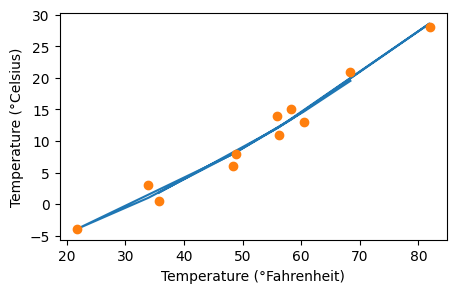

In [104]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *param_best)  # <1>

fig = plt.figure(figsize=(5, 3),dpi=100)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()

#plt.savefig("temp_plot_for_learning_rate_.png", format="png")  # bookskip

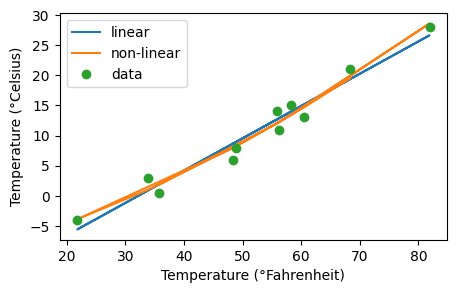

In [111]:
%matplotlib inline
from matplotlib import pyplot as plt
def linear_model(t_u, w, b):
    return w * t_u + b
l_w, l_b=[5.3671, -17.3012]
linear_t_p = linear_model(t_u*0.1, l_w, l_b)  # <1>
fig = plt.figure(figsize=(5, 3),dpi=100)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), linear_t_p.detach().numpy(), label='linear') # <2>
plt.plot(t_u.numpy(), t_p.detach().numpy(), label='non-linear') # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='data')
plt.legend(loc="upper left")
plt.show()